In [10]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
train = np.loadtxt('C:/Users/User/Desktop/Data Scientist/AML/Computer_Vision/Data/digit/train.csv', delimiter=',', skiprows=1)

In [3]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для обаботки виду
train_img = np.reshape(train[:, 1:], (len(train[:, 1:]), 28, 28))

In [4]:
# посмотрим на размер
train_img.shape

(42000, 28, 28)

In [5]:
# выбираем семпл данных для обработки
choices = np.random.choice(train_img.shape[0], 10000)

y = train_label[choices]
X = train_img[choices].reshape(-1, 28 * 28).astype(np.float32)

In [6]:
# центрируем данные
X_mean = X.mean(axis=0)
X -= X_mean

In [7]:
# матрица ковариации признаков
cov = np.dot(X.T, X) / X.shape[0]

In [8]:
U, S, _ = np.linalg.svd(cov)
# U - собсвенные вектора матрицы ковариации
# S - собственные значения

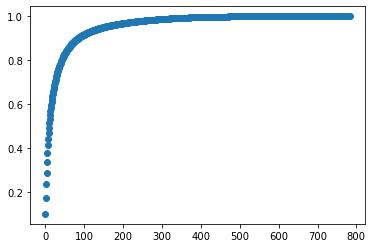

In [11]:
# накопленная сумма собственных значений
S_cumsum = np.cumsum(S) / np.sum(S)
plt.plot(S_cumsum, 'o')

In [12]:
S_thr = 0.75  # задаем порог для накопленной суммы собственных значений

# определяем необходимое число компонент для заданного порога
n_comp = np.argmax(np.where(S_cumsum > S_thr, 1, 0))

print('n_comp=%d S=%.3f' % (n_comp, S_cumsum[n_comp]))

n_comp=32 S=0.753


In [13]:
# получаем сжатое представление объектов
Xrot_reduced = np.dot(X, U[:, :n_comp])

In [14]:
# отделяем данные для валидации
X_val, y_val = Xrot_reduced[-1000:], y[-1000:]

In [15]:
# разделяем данные на train/test
X_train, X_test, y_train, y_test = train_test_split(Xrot_reduced[:-1000], y[:-1000], test_size=0.2, random_state=3)

In [16]:
# обучаем модель на тренировочных данных
clf = RandomForestClassifier(random_state=3)
clf.fit(X_train, y_train)
print(f'Точность модели:  {clf.score(X_test, y_test)}')

Точность модели:  0.9377777777777778


In [17]:
# точность модели на валидационных данных
y_pred = clf.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96        92
         1.0       0.99      0.98      0.99       101
         2.0       0.93      0.92      0.93        90
         3.0       0.95      0.92      0.94       106
         4.0       0.93      0.92      0.93       105
         5.0       0.93      0.95      0.94        91
         6.0       0.94      0.96      0.95        98
         7.0       0.92      0.94      0.93       109
         8.0       0.92      0.94      0.93       103
         9.0       0.91      0.86      0.88       105

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000

